In [28]:
import pandas as pd
import numpy as np



In [29]:
df=pd.read_csv('C:/Users/William Wallace/Desktop/carpeta visual/semana_9/IMDBDataset.csv')
print (df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [30]:
print (df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [31]:
print("total :",df['sentiment'].value_counts())

total : sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [32]:
review =[]
sentences =list(df['review'])
for sen in sentences:
    review.append(sen)

In [33]:
labels = df['sentiment']
labels =np.array(list (map(lambda x:1 if x=="positive" else 0,labels)))

In [34]:
from sklearn.model_selection import train_test_split

train_sentences,test_sentences,train_labels,test_labels = train_test_split(review,labels,test_size=0.20)

In [35]:
vocab_size =1000
max_length=120
embedding_dim=16
trunc_type="post"
padding_type='post'
oov_tok="<OOV>"

In [36]:


import keras
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Genera el diccionario de tokens
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index


#generacion secuencia de tokenizadas

secuencias = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(secuencias,maxlen=max_length,truncating=trunc_type)
#rellena las secuencias a una longitud uniforme


In [37]:
#Generate and pad the test secuencias

test_secuencias=tokenizer.texts_to_sequences(test_sentences)
test_padded = keras.preprocessing.sequence.pad_sequences (test_secuencias,maxlen=max_length,truncating=trunc_type)

In [38]:
#modelos
model =keras.Sequential([
keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
keras.layers.Flatten(),
keras.layers.Dense(64,activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
])

C:\Users\William Wallace\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [39]:
#entrenamiento del modelo
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9964 - loss: 0.0110 - val_accuracy: 0.7612 - val_loss: 2.0434
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9959 - loss: 0.0128 - val_accuracy: 0.7602 - val_loss: 2.0125
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9976 - loss: 0.0080 - val_accuracy: 0.7629 - val_loss: 2.1544
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9978 - loss: 0.0073 - val_accuracy: 0.7629 - val_loss: 2.1992
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9979 - loss: 0.0071 - val_accuracy: 0.7655 - val_loss: 2.1892
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9964 - loss: 0.0100 - val_accuracy: 0.7617 - val_loss: 2.2511
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9976 - loss: 0.0063 - val_accuracy: 0.7640 - val_loss: 2.4083
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9983 - loss: 0.0055 - 

<Axes: >

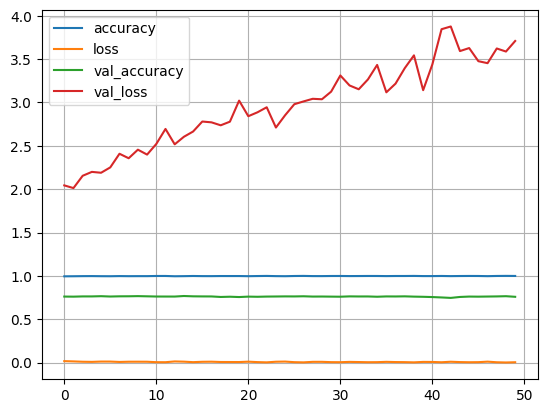

In [42]:
#history= model.fit(padded,train_labels,epochs=2,validation_data=(test_padded,test_labels))

history = model.fit(padded, train_labels, epochs=50, validation_data=(test_padded, test_labels))

#grafica historial
pd.DataFrame(history.history).plot(grid=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


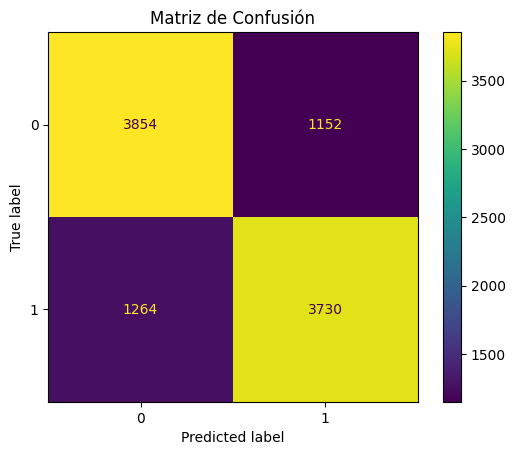

F1 Score: 0.7553665451599838
AUC-ROC: 0.839453368812851


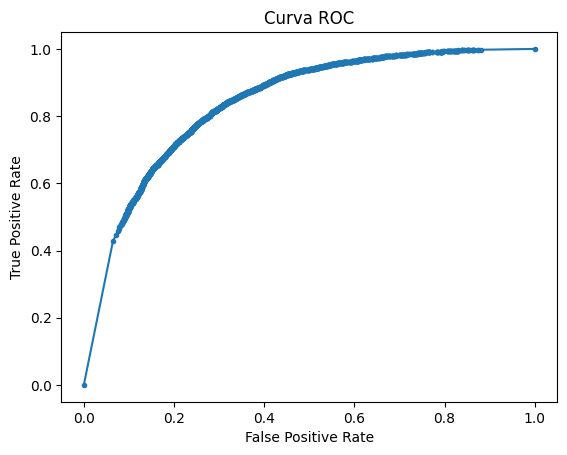

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_prob = model.predict(test_padded)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")  # Convertir predicciones a clases binarias

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# Calcular el F1 score
f1 = f1_score(test_labels, y_pred_classes)
print(f"F1 Score: {f1}")

# Calcular el AUC-ROC
auc = roc_auc_score(test_labels, y_pred_prob)
print(f"AUC-ROC: {auc}")

# Mostrar la curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()